In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

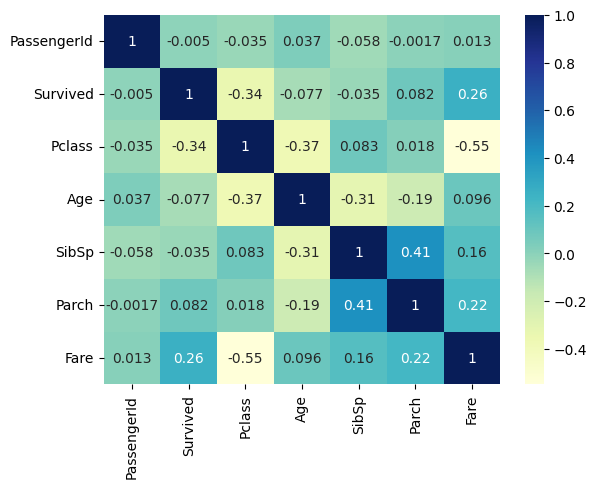

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
corr = titanic_data.select_dtypes(include=['number']).corr()

# Simple heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()


In [110]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived',"Pclass","Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

In [113]:
strat_test_set

PassengerId  Survived  Pclass  \
659          660         0       1   
119          120         0       3   
875          876         1       3   
67            68         0       3   
644          645         1       3   
..           ...       ...     ...   
85            86         1       3   
687          688         0       3   
538          539         0       3   
279          280         1       3   
104          105         0       3   

                                                  Name     Sex    Age  SibSp  \
659                         Newell, Mr. Arthur Webster    male  58.00      0   
119                  Andersson, Miss. Ellis Anna Maria  female   2.00      4   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.00      0   
67                            Crease, Mr. Ernest James    male  19.00      0   
644                             Baclini, Miss. Eugenie  female   0.75      2   
..                                                 ...     ...    ...    ...   
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...  female  33.00      3   
687                                  Dakic, Mr. Branko    male  19.00      0   
538                           Risien, Mr. Samuel Beard    male    NaN      0   
279                   Abbott, Mrs. Stanton (Rosa Hunt)  female  35.00      1   
104                     Gustafsson, Mr. Anders Vilhelm    male  37.00      2   

     Parch     Ticket      Fare Cabin Embarked  
659      2      35273  113.2750   D48        C  
119      2     347082   31.2750   NaN        S  
875      0       2667    7.2250   NaN        C  
67       0  S.P. 3464    8.1583   NaN        S  
644      1       2666   19.2583   NaN        C  
..     ...        ...       ...   ...      ...  
85       0    3101278   15.8500   NaN        S  
687      0     349228   10.1708   NaN        S  
538      0     364498   14.5000   NaN        S  
279      1  C.A. 2673   20.2500   NaN        S  
104      0    3101276    7.9250   NaN        S  

[179 rows x 12 columns]

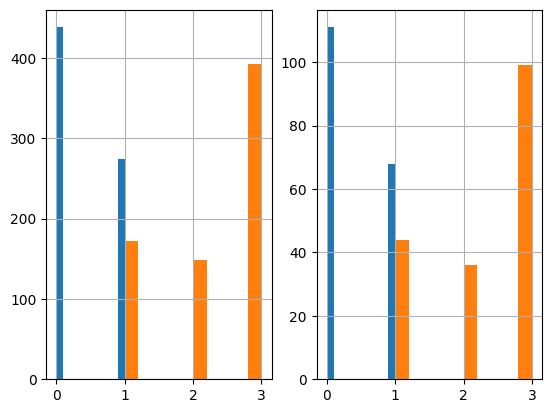

In [10]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [11]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [13]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):

    def fit(self,X,y=None):
      return self

    def transform(self,X):
      imputer=SimpleImputer(strategy="mean")
      X['Age']=imputer.fit_transform(X[['Age']])
      return X


In [91]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Sex -> male, female
        sex_dummies = pd.get_dummies(X["Sex"])
        for col in ["male", "female"]:
            if col not in sex_dummies:
                sex_dummies[col] = 0
        X = X.drop("Sex", axis=1)
        X = pd.concat([X, sex_dummies[["male", "female"]]], axis=1)

        # Embarked -> C, S, Q
        embarked_dummies = pd.get_dummies(X["Embarked"])
        for col in ["C", "S", "Q"]:
            if col not in embarked_dummies:
                embarked_dummies[col] = 0
        X = X.drop("Embarked", axis=1)
        X = pd.concat([X, embarked_dummies[["C", "S", "Q"]]], axis=1)

        return X



In [104]:
class featureDropper(BaseEstimator,TransformerMixin):

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    return X.drop(['Embarked','Name','Ticket','Cabin','Embarked','N'], axis=1, errors="ignore")

In [107]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('age_imputer',AgeImputer()),
    ('feature_encoder',FeatureEncoder()),
])

In [111]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [55]:
strat_train_set

PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Embarked_C  \
867          868         0       1  31.0      0      0   50.4958       False   
619          620         0       2  26.0      0      0   10.5000       False   
50            51         0       3   7.0      4      1   39.6875       False   
286          287         1       3  30.0      0      0    9.5000       False   
834          835         0       3  18.0      0      0    8.3000       False   
..           ...       ...     ...   ...    ...    ...       ...         ...   
482          483         0       3  50.0      0      0    8.0500       False   
518          519         1       2  36.0      1      0   26.0000       False   
54            55         0       1  65.0      0      1   61.9792        True   
603          604         0       3  44.0      0      0    8.0500       False   
802          803         1       1  11.0      1      2  120.0000       False   

     Embarked_Q  Embarked_S  
867       False        True  
619       False        True  
50        False        True  
286       False        True  
834       False        True  
..          ...         ...  
482       False        True  
518       False        True  
54        False       False  
603       False        True  
802       False        True  

[712 rows x 10 columns]

In [56]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    bool   
 8   Embarked_Q   712 non-null    bool   
 9   Embarked_S   712 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 46.6 KB


In [59]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop('Survived',axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [60]:
X_data

array([[ 1.6422641 , -1.56828591,  0.12354285, ..., -0.46369933,
        -0.31963602,  0.61197825],
       [ 0.67661178, -0.37019624, -0.26296623, ..., -0.46369933,
        -0.31963602,  0.61197825],
       [-1.53893728,  0.82789342, -1.73170073, ..., -0.46369933,
        -0.31963602,  0.61197825],
       ...,
       [-1.52336225, -1.56828591,  2.75180459, ...,  2.15656988,
        -0.31963602, -1.63404501],
       [ 0.61431163,  0.82789342,  1.12846645, ..., -0.46369933,
        -0.31963602,  0.61197825],
       [ 1.38916974, -1.56828591, -1.42249347, ..., -0.46369933,
        -0.31963602,  0.61197825]])

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_grid={
    'n_estimators':[10, 100, 200, 500],"max_depth": [None, 5, 10 ],"min_samples_split":[2,3,4]
    }

grid_search=GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [63]:
final_clf=grid_search.best_estimator_

In [64]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=500)

In [65]:
RandomForestClassifier(max_depth=5, n_estimators=500)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [66]:
strat_test_set=pipeline.fit(strat_test_set).transform(strat_test_set)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [67]:
strat_test_set

PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare  Sex_female  \
659          660         0       1  58.00      0      2  113.2750       False   
119          120         0       3   2.00      4      2   31.2750        True   
875          876         1       3  15.00      0      0    7.2250        True   
67            68         0       3  19.00      0      0    8.1583       False   
644          645         1       3   0.75      2      1   19.2583        True   
..           ...       ...     ...    ...    ...    ...       ...         ...   
85            86         1       3  33.00      3      0   15.8500        True   
687          688         0       3  19.00      0      0   10.1708       False   
538          539         0       3  29.00      0      0   14.5000       False   
279          280         1       3  35.00      1      1   20.2500        True   
104          105         0       3  37.00      2      0    7.9250       False   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
659      True        True       False       False  
119     False       False       False        True  
875     False        True       False       False  
67       True       False       False        True  
644     False        True       False       False  
..        ...         ...         ...         ...  
85      False       False       False        True  
687      True       False       False        True  
538      True       False       False        True  
279     False       False       False        True  
104      True       False       False        True  

[179 rows x 12 columns]

In [119]:
X=strat_test_set.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y=strat_test_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_grid={
    "n_estimators":[10, 100, 200, 500],"max_depth":[None,5, 10],"min_samples_split":[2,3,4]
}

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [121]:
final_clf=grid_search.best_estimator_

In [124]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=10)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = final_clf.predict(X_data)

# Calculate evaluation metrics
accuracy = accuracy_score(y_data, y_pred)
precision = precision_score(y_data, y_pred)
recall = recall_score(y_data, y_pred)
f1 = f1_score(y_data, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8659
Precision: 0.8548
Recall: 0.7794
F1-Score: 0.8154


In [127]:
strat_test_set

PassengerId  Survived  Pclass  \
659          660         0       1   
119          120         0       3   
875          876         1       3   
67            68         0       3   
644          645         1       3   
..           ...       ...     ...   
85            86         1       3   
687          688         0       3   
538          539         0       3   
279          280         1       3   
104          105         0       3   

                                                  Name    Age  SibSp  Parch  \
659                         Newell, Mr. Arthur Webster  58.00      0      2   
119                  Andersson, Miss. Ellis Anna Maria   2.00      4      2   
875                   Najib, Miss. Adele Kiamie "Jane"  15.00      0      0   
67                            Crease, Mr. Ernest James  19.00      0      0   
644                             Baclini, Miss. Eugenie   0.75      2      1   
..                                                 ...    ...    ...    ...   
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...  33.00      3      0   
687                                  Dakic, Mr. Branko  19.00      0      0   
538                           Risien, Mr. Samuel Beard  28.00      0      0   
279                   Abbott, Mrs. Stanton (Rosa Hunt)  35.00      1      1   
104                     Gustafsson, Mr. Anders Vilhelm  37.00      2      0   

        Ticket      Fare Cabin   male  female      C      S      Q  
659      35273  113.2750   D48   True   False   True  False  False  
119     347082   31.2750   NaN  False    True  False   True  False  
875       2667    7.2250   NaN  False    True   True  False  False  
67   S.P. 3464    8.1583   NaN   True   False  False   True  False  
644       2666   19.2583   NaN  False    True   True  False  False  
..         ...       ...   ...    ...     ...    ...    ...    ...  
85     3101278   15.8500   NaN  False    True  False   True  False  
687     349228   10.1708   NaN   True   False  False   True  False  
538     364498   14.5000   NaN   True   False  False   True  False  
279  C.A. 2673   20.2500   NaN  False    True  False   True  False  
104    3101276    7.9250   NaN   True   False  False   True  False  

[179 rows x 15 columns]

In [129]:
X_test=strat_test_set.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [130]:
final_clf.score(X_data_test,y_data_test)

0.8659217877094972

In [131]:
final_data=pipeline.fit_transform(titanic_data)

In [132]:
final_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  28.0      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin   male  female      C      S      Q  
0           A/5 21171   7.2500   NaN   True   False  False   True  False  
1            PC 17599  71.2833   C85  False    True   True  False  False  
2    STON/O2. 3101282   7.9250   NaN  False    True  False   True  False  
3              113803  53.1000  C123  False    True  False   True  False  
4              373450   8.0500   NaN   True   False  False   True  False  
..                ...      ...   ...    ...     ...    ...    ...    ...  
886            211536  13.0000   NaN   True   False  False   True  False  
887            112053  30.0000   B42  False    True  False   True  False  
888        W./C. 6607  23.4500   NaN  False    True  False   True  False  
889            111369  30.0000  C148   True   False   True  False  False  
890            370376   7.7500   NaN   True   False  False  False   True  

[891 rows x 15 columns]

In [135]:
X_final =final_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_final =final_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [136]:
prod_clf=RandomForestClassifier()

param_grid={
    'n_estimators':[10, 100, 200, 500],"max_depth": [None, 5, 10 ],"min_samples_split":[2,3,4]
    }

grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [137]:
prod_final_clf=grid_search.best_estimator_

In [138]:
prod_final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [139]:
titanic_test_data=pd.read_csv('test.csv')

In [140]:
titanic_test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [141]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [142]:
final_test_data

PassengerId  Pclass                                          Name   Age  \
0            892       3                              Kelly, Mr. James  34.5   
1            893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2            894       2                     Myles, Mr. Thomas Francis  62.0   
3            895       3                              Wirz, Mr. Albert  27.0   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   
..           ...     ...                                           ...   ...   
413         1305       3                            Spector, Mr. Woolf  27.0   
414         1306       1                  Oliva y Ocana, Dona. Fermina  39.0   
415         1307       3                  Saether, Mr. Simon Sivertsen  38.5   
416         1308       3                           Ware, Mr. Frederick  27.0   
417         1309       3                      Peter, Master. Michael J  27.0   

     SibSp  Parch              Ticket      Fare Cabin   male  female      C  \
0        0      0              330911    7.8292   NaN   True   False  False   
1        1      0              363272    7.0000   NaN  False    True  False   
2        0      0              240276    9.6875   NaN   True   False  False   
3        0      0              315154    8.6625   NaN   True   False  False   
4        1      1             3101298   12.2875   NaN  False    True  False   
..     ...    ...                 ...       ...   ...    ...     ...    ...   
413      0      0           A.5. 3236    8.0500   NaN   True   False  False   
414      0      0            PC 17758  108.9000  C105  False    True   True   
415      0      0  SOTON/O.Q. 3101262    7.2500   NaN   True   False  False   
416      0      0              359309    8.0500   NaN   True   False  False   
417      1      1                2668   22.3583   NaN   True   False   True   

         S      Q  
0    False   True  
1     True  False  
2    False   True  
3     True  False  
4     True  False  
..     ...    ...  
413   True  False  
414  False  False  
415   True  False  
416   True  False  
417  False  False  

[418 rows x 14 columns]

In [143]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   male         418 non-null    bool   
 10  female       418 non-null    bool   
 11  C            418 non-null    bool   
 12  S            418 non-null    bool   
 13  Q            418 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(3)
memory usage: 31.6+ KB


In [151]:
X_full_test = final_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

scaler=StandardScaler()
X_data_full_test=scaler.fit_transform(X_full_test)

In [152]:
predictions=prod_final_clf.predict(X_data_full_test)

In [146]:
predictions

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [154]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv("prediction.csv",index=False)

In [155]:
final_df

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]